In [30]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [31]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [32]:
X_test.shape

(10000, 32, 32, 3)

In [33]:
y_train.shape

(50000, 1)

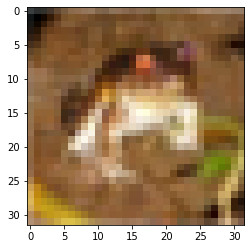

In [34]:
plt.imshow(X_train[0])

In [35]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [36]:
y_test = y_test.reshape(-1,)


In [37]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [38]:
classes[9]

'truck'

In [39]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

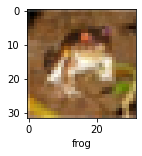

In [40]:
plot_sample(X_train, y_train, 0)

In [41]:
X_train= X_train/255
X_test = X_test/255

In [42]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [43]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5050 - accuracy: 0.4557
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1482 - accuracy: 0.5942
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0099 - accuracy: 0.6471
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9247 - accuracy: 0.6809
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8613 - accuracy: 0.7003
Epoch 6/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.8046 - accuracy: 0.7198
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7510 - accuracy: 0.7393
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7028 - accuracy: 0.7549
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6633 - accuracy: 0.7677
Epoch 10/10
1563/1563 [==============================] - 38s 24m

In [45]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9222 - accuracy: 0.6984


[0.9222060441970825, 0.6984000205993652]

In [46]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.7972440e-03, 2.6313412e-05, 4.4545383e-04, 7.8198415e-01,
        1.0040783e-03, 9.5642924e-02, 9.3151979e-02, 1.9149531e-05,
        2.5541253e-02, 3.8748639e-04],
       [8.9927256e-04, 5.2613903e-02, 3.9804713e-06, 1.0311228e-06,
        1.3757070e-08, 3.3431720e-09, 1.6765895e-08, 8.2431185e-08,
        9.4645619e-01, 2.5515386e-05],
       [1.2295322e-01, 5.4136825e-01, 2.1514741e-03, 2.6852705e-03,
        1.8739569e-03, 8.2100258e-04, 1.5050717e-04, 7.7310861e-03,
        2.9929438e-01, 2.0970887e-02],
       [9.7200900e-01, 5.8242693e-03, 6.7987489e-03, 2.8599080e-04,
        3.3266662e-04, 1.8142360e-06, 2.8261373e-05, 1.3968231e-04,
        1.4353843e-02, 2.2579677e-04],
       [2.3260150e-06, 1.1272367e-06, 4.8754672e-03, 1.1941880e-02,
        6.0692263e-01, 2.5384658e-04, 3.7599835e-01, 1.7662866e-06,
        2.5808342e-06, 1.2912523e-08]], dtype=float32)

In [47]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [48]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

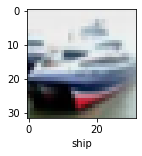

In [49]:
plot_sample(X_test, y_test,1)

In [50]:
classes[y_classes[1]]

'ship'

In [51]:
classes[y_classes[1]]

'ship'